In [6]:
import pandas as pd

train = pd.read_csv("../data/processed/train.csv")
test = pd.read_csv("../data/processed/test.csv")

print(train.head())
# Expected columns: ['tweet_id', 'text', 'label']


              tweet_id sentiment
0  1213084822521950209   neutral
1  1213011490372038656   neutral
2  1213763702715043840     mixed
3  1213764224356421633   neutral
4  1212766574337150976  positive


In [11]:
import sys
import os

# Add the parent directory to sys.path so 'utils' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.preprocessing import clean_amharic_text

# Load and clean the train and test CSV files
train_clean = clean_amharic_text("../data/processed/train.csv")
test_clean = clean_amharic_text("../data/processed/test.csv")

In [15]:
# 01_data_cleaning.ipynb

# --- 1. Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import sys

# --- 2. Add src/ to system path for import ---
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.preprocessing import clean_amharic_text

# --- 3. Load Dataset ---
df = pd.read_csv("../data/raw/data_preprocess/train.csv")  # Adjust path/file if needed
df.head()



,Unnamed: 0,tweet_id,sentiment,tweet
0,0,1213084822521950209,neutral,NaN
1,1,1213011490372038656,neutral,ልዩ የተፈጥሮ ገፅታ \n *****\n\nየምስራቅ አፍሪካ የውሃ ማማ ጮቄ
2,2,1213763702715043840,mixed,@AbbaSheger ማንም ቢሆን የሀገሩን ጥቅም አሳልፎ አይሰጥም። ያ መላ...
3,3,1213764224356421633,neutral,ብ/ጄ አሳምነው ጽጌ ከምክትል ጠ/ሚ ደመቀ ጋር በሱዳን ጉብኝት አልበሽር ...
4,4,1212766574337150976,positive,NaN


In [16]:
# --- 4. Basic Info ---
print("Dataset Info:")
df.info()

print("\nClass Distribution:")
print(df["tweet_id"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7511 entries, 0 to 7510
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7511 non-null   int64 
 1   tweet_id    7511 non-null   int64 
 2   sentiment   7511 non-null   object
 3   tweet       6282 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.8+ KB

Class Distribution:
tweet_id
1214774832161853441    2
1212240540495990786    2
1203340971326312448    2
1213304716798709760    2
1200955913865183233    2
                      ..
1212925000610721792    1
1201475433780219904    1
1212741943412822016    1
1213033524766351360    1
1213015791190364162    1
Name: count, Length: 7503, dtype: int64


In [20]:
# --- 5. Add Cleaned Column ---
df["cleaned_tweets"] = df["tweet"].fillna("").apply(clean_amharic_text)
df[["tweet_id", "sentiment", "cleaned_tweets"]].head()


,tweet_id,sentiment,cleaned_tweets
0,1213084822521950209,neutral,
1,1213011490372038656,neutral,ልዩ የተፈጥሮ ገፅታ የምስራቅ አፍሪካ የውሀ ማማ ጮቄ
2,1213763702715043840,mixed,abbasheger ማንም ቢሆን የሀገሩን ጥቅም አሳልፎ አይሰጥም ያ መላጣ ...
3,1213764224356421633,neutral,ብጄ አሳምነው ፅጌ ከምክትል ጠሚ ደመቀ ጋር በሱዳን ጉብኝት አልበሽር ያሉ...
4,1212766574337150976,positive,


/var/folders/7t/c5_w5s0j5vd0kmvlz4qfwcv40000gn/T/ipykernel_4035/1620065107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


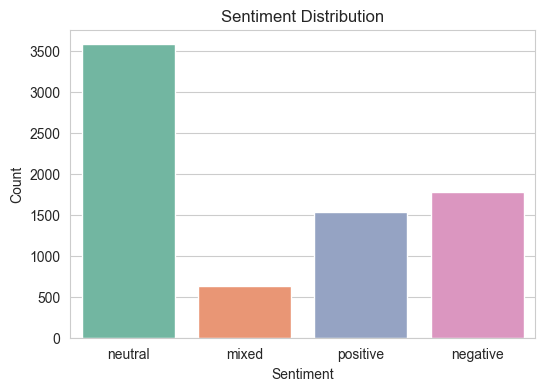

In [22]:
# --- 6. Visualize Sentiment Distribution ---
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


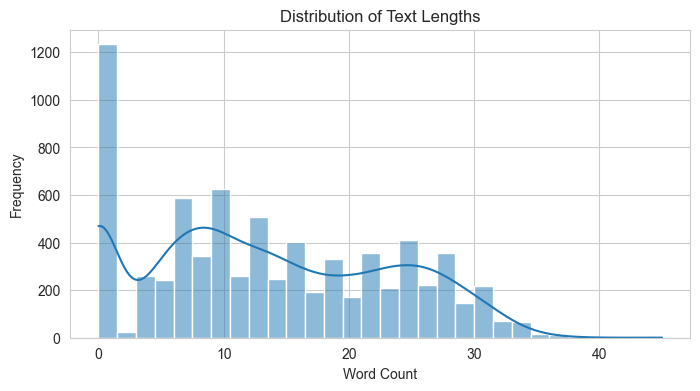

In [24]:
# --- 7. Text Length Analysis ---
df["text_length"] = df["cleaned_tweets"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


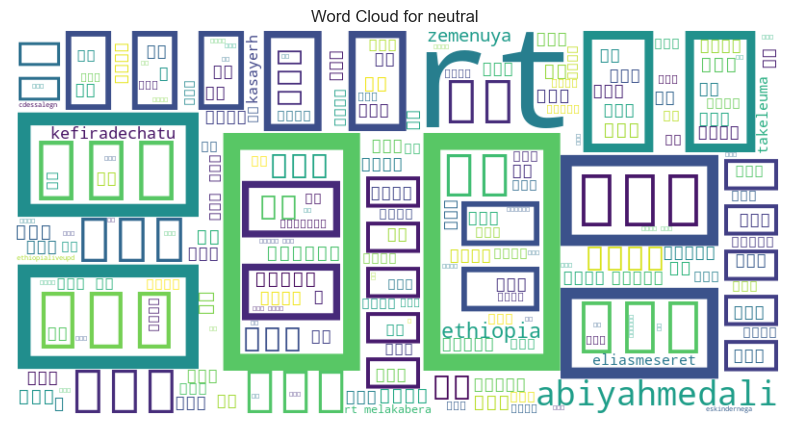

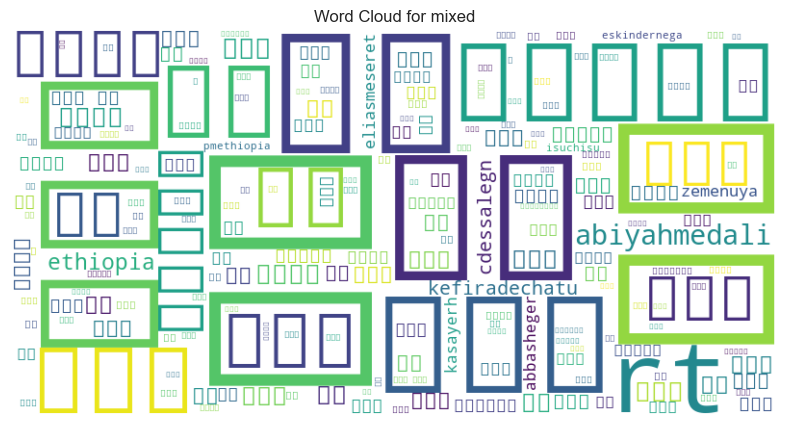

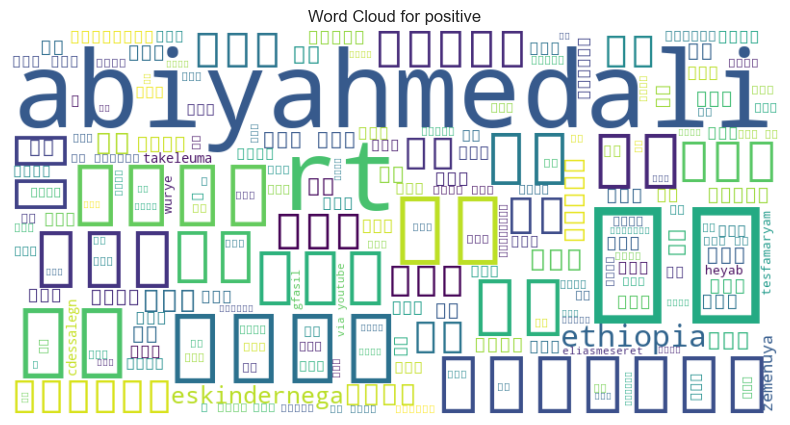

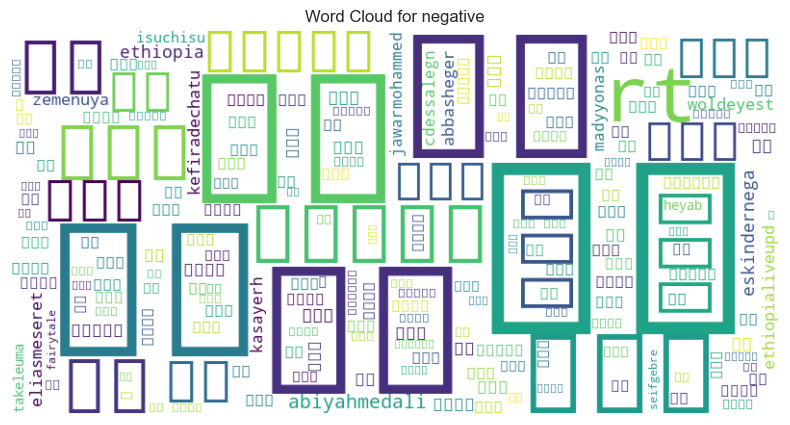

In [32]:
# --- 8. Word Clouds (Optional) ---
def show_wordcloud(sentiment):
    text = " ".join(df[df["sentiment"] == sentiment]["cleaned_tweets"].dropna())
    wc = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment}")
    plt.show()

for sentiment in df["sentiment"].unique():
    show_wordcloud(sentiment)
